## Analyse der MedReg Daten über Psychiater

In diesem Notebook sollen die bereinigten und überprüften Daten aus den beiden Notenooks [05_MedReg_Analyse_01_Daten_reinigen](05_MedReg_Analyse_01_Daten_reinigen.ipynb) und [MedReg_Analyse_02_Datencheck](/python_deleted_code/MedReg_Analyse_02_Datencheck.ipynb) einer weiteren Analyse unterzogen werden. 

Mit den bereinigten [Daten](/data_scraping/medreg_2020_psych_b2019_20200128.csv) sollen hier folgende Auswertungen wiederholt oder neu gemacht werden:

1. Stand Facharztabschlüsse Psychiatrie und Physotheraphie nach Nationalität per Ende 2019 (auf Basis von Land Medizinsudium und der direkten Anerkennungen ausländischer Facharzttiteln)

2. Aussagen über die Nationalität bzw. Studienort der anerkannten Weiterbildungstitel

3. Entwicklung Anteil der Anerkennung (sprich: Neuzulassung) per Jahresende, über die Jahre, bis Ende 2019


Für diese Analysen werde ich die Daten **aller** registrierten Arzttitel verwenden und nicht bloss jene mit erteilter Bewilligung, da diese nur für eine bestimmte Art von (selbstständigen) Tätigkeiten nötig ist. So schrieb das BAG auf eine Anfrage im letzten Herbst: *«Die Statistiken des BAG zu den aktiven Bewilligungen nach MedBG 2018 resultieren aus den von den Kantonen erteilten Berufsausübungsbewilligungen. Eine solche Bewilligung ist aufgrund des Medizinalberufegesetzes (MedBG) für die privatwirtschaftliche Berufsausübung in eigener fachlicher Verantwortung notwendig. Es sind somit nicht alle Tätigkeiten bewilligungspflichtig. Entsprechend kann das BAG keine Aussagen dazu machen, wie viele Ärzt/innen in der Schweiz ihren Beruf tatsächlich ausüben.»*

Auf telefonische Nachfrage beim BAG wurde mir am 7.2.2020 nochmals bestätigt, dass es möglich ist, dass auch Psychiater ohne Bewilligung tätig sind, z.B. delegiert bei einem anderen Psychiater, also nicht in eigener Fachverantwortung und auch ohne ZSR-Nummer für die Abrechnung via Krankenkasse.


In weiteren Analysen würde ich später auch gerne noch Fragen untersucht werden, wie:

Weitere Analysen:
- regionale Aussagen über die Tätigkeitsorte (Adresse der Bewilligung) wie zum Beispiel:
- Vergleich zur Kantonsbevölkerung? (aussagekräftig?)
- Städtische Gebiete, ländliche Gebiete? (aufwändig)
- Grossstädte vs. landliche Zentren?

In [2]:
import pandas as pd
import re
import numpy as np
import datetime

In [5]:
df = pd.read_csv(r'/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/data_scraping/medreg_2020_psych_b2019_20200128.csv')

In [6]:
len(df)

5413

In [7]:
df_erteilt = df[df['BAB Status'] == 'Erteilt']

In [8]:
len(df_erteilt)

4415

Wir haben also insgesamt 5413 registrierte Fachärzte per Ende 2019 im MedReg. Diese Zahl erscheint plausibel, waren es doch am 7.1.2020 5420 Einträge:

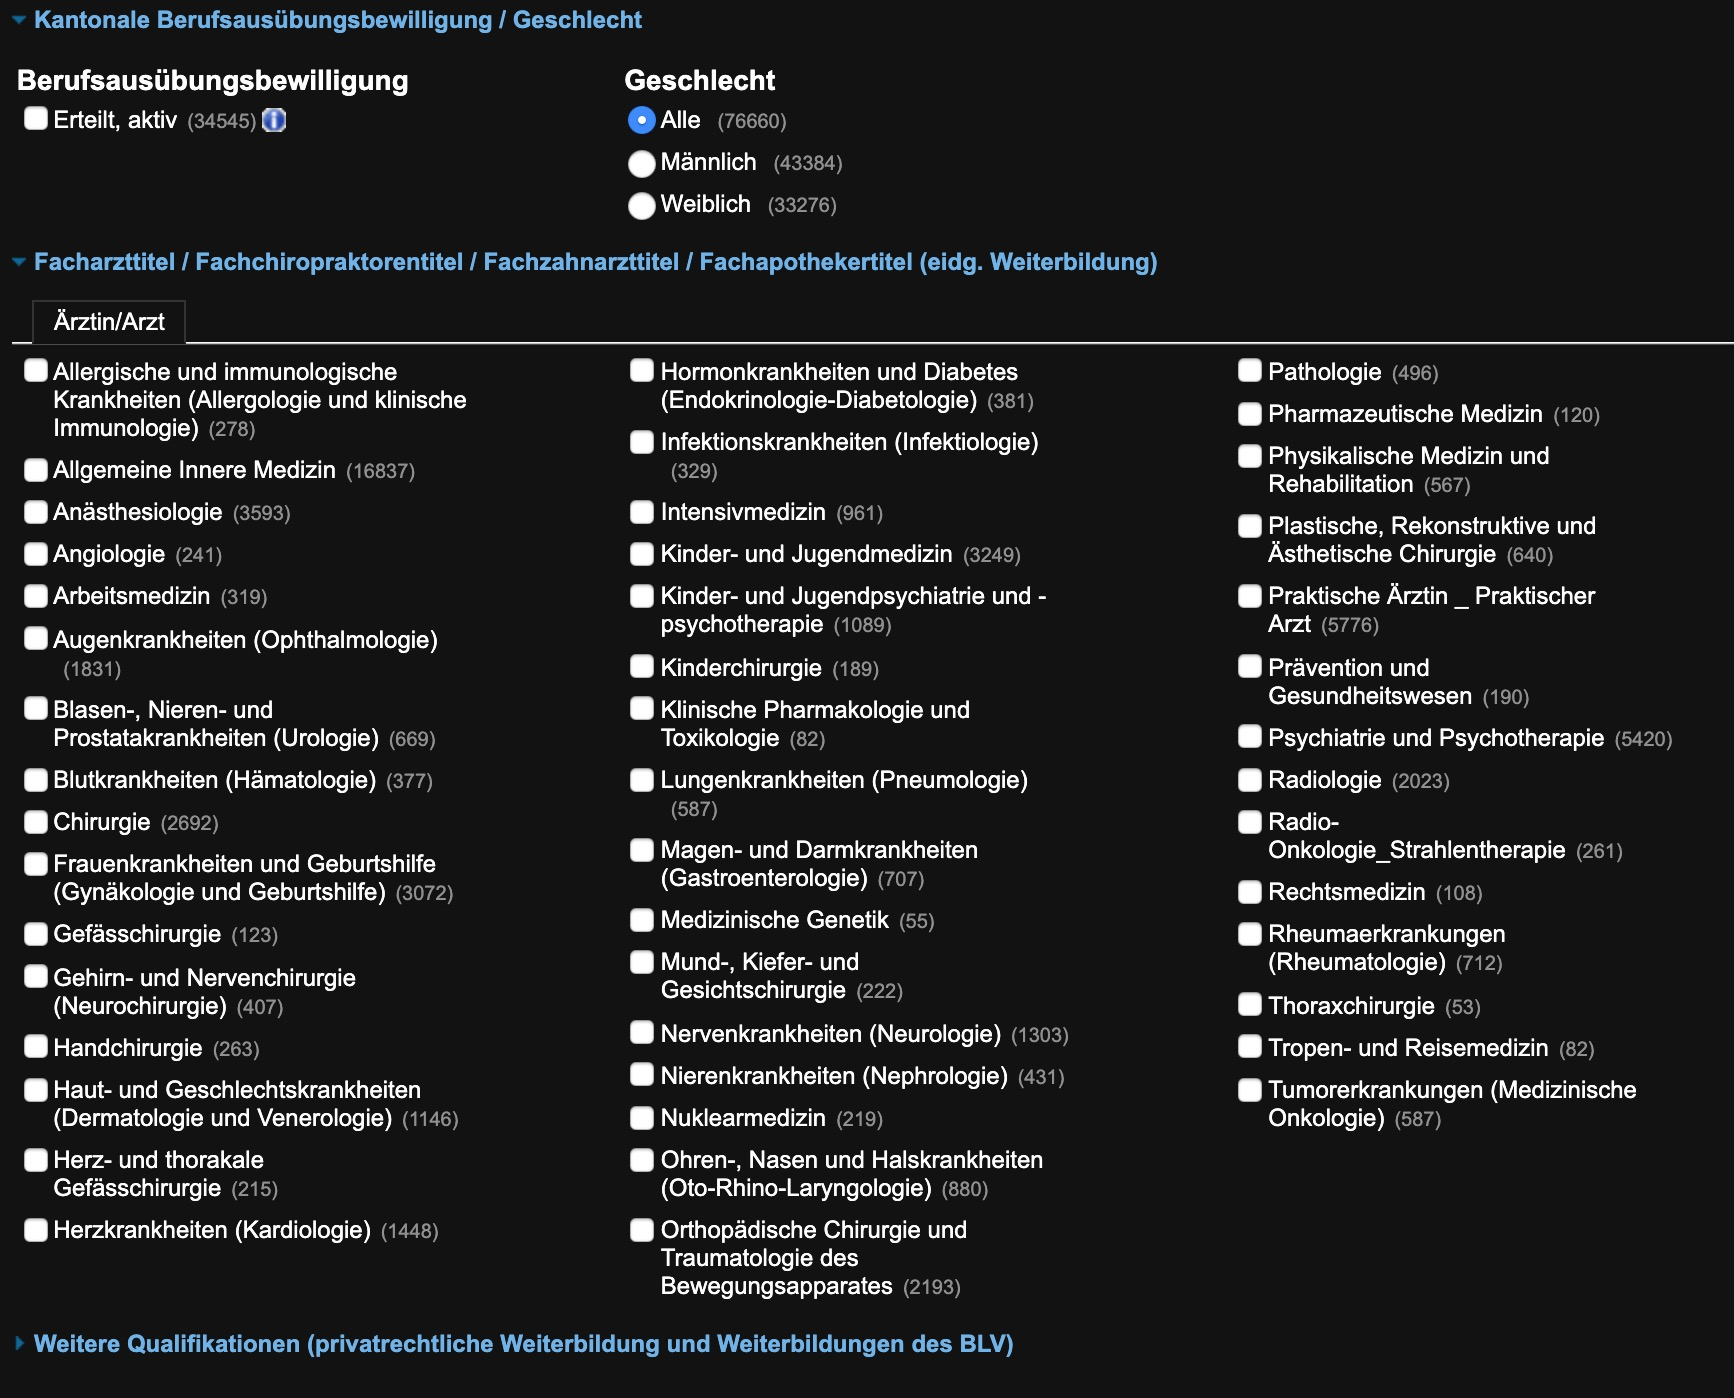

## 1. Analyse: Herkunft der Psychiaterinnen und Psychiater nach dem Land ihres Medizinstudiums


In [9]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
Doc_ID                     int64
Name                      object
Geschlecht                object
Adresse                   object
Ort                       object
Nationalität              object
Sprache                   object
Arzt_Jahr                  int64
Arzt_Land                 object
Arzt_Anerkennung_Jahr    float64
PP_Jahr                    int64
PP_Land                   object
PP_Anerkennung             int64
BAB                       object
BAB Status                object
Datei                     object
PP_CH                      int64
dtype: object

In [10]:
df_arzt_land = df['Arzt_Land'].value_counts()

In [11]:
df_arzt_land = df_arzt_land.reset_index()

In [12]:
df_arzt_land.head(10)

,index,Arzt_Land
0,Schweiz,2833
1,Deutschland,1354
2,Frankreich,316
3,Italien,213
4,Österreich,179
5,Spanien,73
6,Rumänien,61
7,Griechenland,57
8,vorm. Jugoslawien,42
9,Belgien,41


In [13]:
df_arzt_land = df_arzt_land.rename(columns = {'index':'Land Medizinstudium', 'Arzt_Land':'Anzahl'})

In [14]:
df_arzt_land['Anteil'] = df_arzt_land['Anzahl'] / 5413 * 100

In [18]:
df_arzt_land.to_csv(r'/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/analysis_output/Psych_Land_Medizinstudium_bis2019.csv',index = 'Land Medizinstudium', header=True)

In [21]:
df_arzt_land.head(10)

,Land Medizinstudium,Anzahl,Anteil
0,Schweiz,2833,52.336967
1,Deutschland,1354,25.013856
2,Frankreich,316,5.837798
3,Italien,213,3.934971
4,Österreich,179,3.306854
5,Spanien,73,1.348605
6,Rumänien,61,1.126917
7,Griechenland,57,1.053021
8,vorm. Jugoslawien,42,0.775910
9,Belgien,41,0.757436


### Resultat 1: 52.3% aller in der Schweiz registrierten Psychiaterinnen und Psychiater haben ihr Grundstudium in der Schweiz absolviert. 25% haben einen deutschen Abschluss, 5.8% einen französischen. (Stand: Ende 2019).
Wir möchten diese Zahl noch in den Kontext mit anderen Fachrichtungen stellen. Dazu müssen wir aber den gesamten Datensatz aus dem Scraping nochmals aufbereiten. Dies soll zu einem späteren Zeitpunkt nachgeholt werden, falls es die Zeit erlaubt. Als Vergleich schauen wir uns noch kurz die Nationalität der registrierten Ärzte an. Allerdings ist dieser Wert meiner Meinung nach weniger aussagekräftig, da er über die Jahre durch Einbürgerungen verwässert wird. 

In [22]:
df_nation = df['Nationalität'].value_counts()

In [23]:
df_nation = df_nation.reset_index()

In [24]:
df_nation = df_nation.rename(columns = {'index':'Nationlität', 'Nationalität':'Anzahl'})

In [25]:
df_nation['Anteil'] = df_nation['Anzahl'] / 5413 * 100

In [26]:
df_nation.head(10)

,Nationlität,Anzahl,Anteil
0,Schweiz (CH),2938,54.276741
1,Deutschland (DE),1358,25.087752
2,Frankreich (FR),355,6.558286
3,Italien (IT),188,3.473120
4,Österreich (AT),162,2.992795
5,Griechenland (GR),71,1.311657
6,Spanien (ES),66,1.219287
7,Rumänien (RO),44,0.812858
8,Belgien (BE),35,0.646592
9,Bulgarien (BG),15,0.277111


In [27]:
df_nation.to_csv(r'/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/analysis_output/Psych_Nationalitaet_bis2019.csv',index = 'Nationalität', header=True)

### Restultat 2: nach Nationalität ergibt sich ein ähnliches Bild. Danach sind 54.3% Schweizer, 25.1% Deutsche und 6.6% Franzosen.

Zum Vergleich wollen wir noch die Daten aller Ärzte mit erteilter Bewilligung auswerten. Bei diesen ist vermutlich der Anteil der niedergelassenen, selbstständig tätigen Ärzte höher. 

In [28]:
df_erteilt_arzt_land = df_erteilt['Arzt_Land'].value_counts()

In [29]:
df_erteilt_arzt_land = df_erteilt_arzt_land.reset_index()

In [30]:
df_erteilt_arzt_land.head(5)

,index,Arzt_Land
0,Schweiz,2544
1,Deutschland,991
2,Frankreich,202
3,Italien,151
4,Österreich,139


In [31]:
df_erteilt_arzt_land = df_erteilt_arzt_land.rename(columns = {'index':'Land Medizinstudium', 'Arzt_Land':'Anzahl'})

In [32]:
df_erteilt_arzt_land['Anteil'] = df_erteilt_arzt_land['Anzahl'] / 4415 * 100

In [34]:
df_erteilt_arzt_land.to_csv(r'/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/analysis_output/Psych_BAB_Land_Medizinstudium_bis2019.csv',index = 'Land Medizinstudium', header=True)

In [35]:
df_erteilt_arzt_land.head(5)

,Land Medizinstudium,Anzahl,Anteil
0,Schweiz,2544,57.621744
1,Deutschland,991,22.446206
2,Frankreich,202,4.575311
3,Italien,151,3.420159
4,Österreich,139,3.148358


### Restultat 3: mit erteilter Bewilligung liegt der Schweizer Anteil höher: 57.6% CH-Medizinstudium, 22.4% Deutschland. 

Jetzt schauen wir genauer hin. Wie war das mit den neuzugelassenen Psychiatern im letzten Jahr?

In [37]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Doc_ID,Name,Geschlecht,Adresse,Ort,Nationalität,Sprache,Arzt_Jahr,Arzt_Land,Arzt_Anerkennung_Jahr,PP_Jahr,PP_Land,PP_Anerkennung,BAB,BAB Status,Datei,PP_CH
0,0,0,552,"Poleski, Alexander",m,"Chemin des Allières 1,1012 Lausanne,VD",1012 Lausanne,Schweiz (CH),Französisch,1985,Schweiz,NaN,1986,Schweiz,0,"Waadt (1986), aktiv, MedBG, pri...",Erteilt,medreg_552.html,1986


In [38]:
df2019 = df[df['PP_CH'] == 2019]

In [39]:
total = len(df2019)

In [40]:
df2019 = df2019['Arzt_Land'].value_counts().reset_index().rename(columns = {'index':'Land Medizinstudium', 'Arzt_Land':'Anzahl'})

In [41]:
df2019.head(2)

,Land Medizinstudium,Anzahl
0,Deutschland,54
1,Schweiz,35


In [42]:
df2019['Anteil'] = df2019['Anzahl'] / int(total) * 100

In [43]:
df2019.head(5)

,Land Medizinstudium,Anzahl,Anteil
0,Deutschland,54,29.508197
1,Schweiz,35,19.125683
2,Frankreich,29,15.846995
3,Österreich,12,6.557377
4,Griechenland,9,4.918033


In [44]:
df2019.to_csv(r'/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/analysis_output/Psych_BAB_Land_Medizinstudium_2019.csv',index = 'Land Medizinstudium', header=True)

### Restultat 4: 2019 waren von den 183 neu registrierten Fachärzten Psychiatrie und Psychotherapie nur 35 darunter, die in der Schweiz Medizin studiert hatten. Das sind bloss 19%! 30% hatten ein deutsches Medizinstudium, 16% ein französisches. Ein Drittel verteilt sich auf die weiteren Länder. 

## 2. Analyse: Entwicklung Anteil der Anerkennung (sprich: Neuzulassung) per Jahresende, über die Jahre
Wir möchten uns jetzt anschauen, wie sich dieser Anteil über die letzten Jahre entwickelt hat. 

Es muss uns dabei bewusst sein, dass wir dabei die Daten eines dynamischen Registers verwenden und es ein Blick zurück vom Stand Ende 2019 ist. Das heisst: je weiter wir zurückblicken, desto mehr sind die Zahlen durch Mutationen verwässert.

Zuerst ein Überblick über die Anzahl Zulassungen über die letzten Jahre. Wieviele Diplome gingen jeweils an Medizinabsolventen mit Schweizer Arztdiplom?


In [45]:
df[df['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count()

PP_CH
1957      2
1960      1
1964      2
1967      4
1968      2
1969      5
1970      4
1971      4
1972      2
1973     11
1974      9
1975     15
1976     10
1977     18
1978     25
1979     18
1980     37
1981     40
1982     36
1983     46
1984     59
1985     53
1986     69
1987     49
1988     77
1989     71
1990     79
1991     85
1992     74
1993     65
1994     73
1995     82
1996     71
1997     69
1998     70
1999     76
2000     58
2001     57
2002    109
2003    146
2004     72
2005     78
2006     91
2007     66
2008    103
2009     80
2010     74
2011     69
2012     74
2013     75
2014     56
2015     38
2016     41
2017     48
2018     50
2019     35
Name: PP_CH, dtype: int64

In [46]:
%matplotlib inline

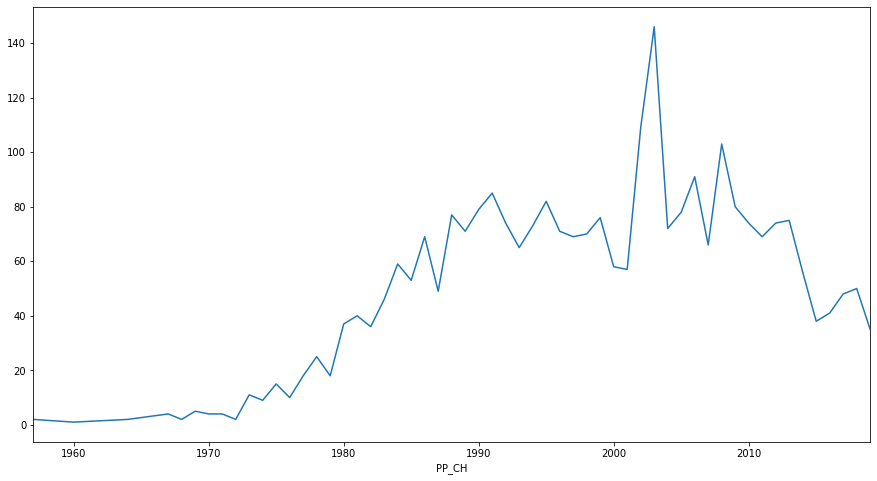

In [47]:
df[df['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(figsize=(15,8))

Anmerkung: der Peak 2002 lässt sich mit der Einführung der Personenfreizügigkeit erklären (Bilaterale), 2012 dann wiederum lieft die zwischenzeitlich eingeführte Notfallklausel (Beschränkung) aus. 

Und jetzt nehmen wir noch die Daten aller ohne schweizerisches Medizinstudium hinzu:

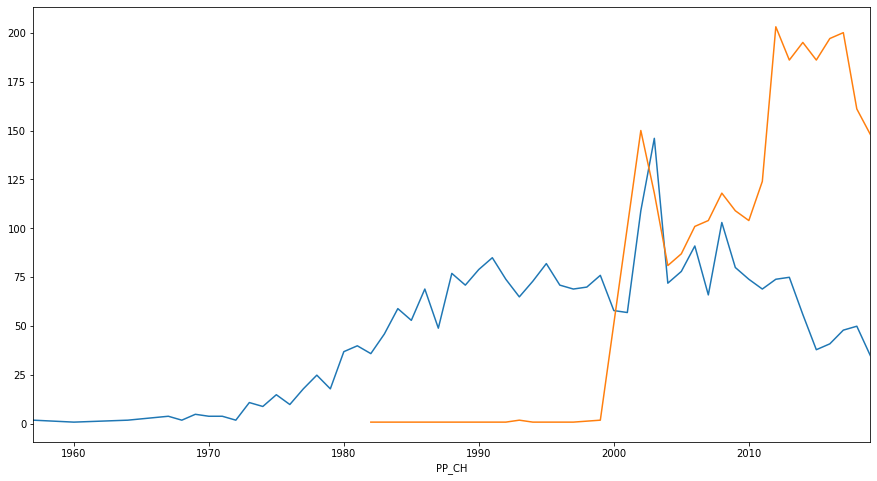

In [48]:
chart1 = df[df['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(figsize=(15,8))
df[df['Arzt_Land'] != "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(ax=chart1)

Nächster Schritt: wir wollen jetzt die Daten aller Schweizer und ausländischen Medizinstudium-Absolventen in ein neues Dataframe überführen, zur Auswertung. 

In [49]:
df_all = pd.DataFrame()

In [50]:
df_all['CH'] = df[df['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count()
df_all['Ausland'] = df[df['Arzt_Land'] != "Schweiz"].groupby('PP_CH')['PP_CH'].count()
df_all['Total'] = df_total = df.groupby('PP_CH')['PP_CH'].count()

In [51]:
df_all = df_all.reset_index()

In [53]:
df_all.tail(3)

,PP_CH,CH,Ausland,Total
53,2017,48,200.0,248
54,2018,50,161.0,211
55,2019,35,148.0,183


In [54]:
df_all.rename(columns = {'PP_CH' : 'Jahr'})

,Jahr,CH,Ausland,Total
0,1957,2,NaN,2
1,1960,1,NaN,1
2,1964,2,NaN,2
3,1967,4,NaN,4
4,1968,2,NaN,2
5,1969,5,NaN,5
6,1970,4,NaN,4
7,1971,4,NaN,4
8,1972,2,NaN,2
9,1973,11,NaN,11


In [55]:
df_all['CH %'] = df_all['CH'] / df_all['Total'] * 100

In [56]:
df_all['Ausl %'] = df_all['Ausland'] / df_all['Total'] * 100

In [64]:
df_all.tail(20)

,Jahr,CH,Ausland,Total,CH %,Ausl %
36,2000,58,NaN,58,100.000000,NaN
37,2001,57,NaN,57,100.000000,NaN
38,2002,109,150.0,259,42.084942,57.915058
39,2003,146,118.0,264,55.303030,44.696970
40,2004,72,81.0,153,47.058824,52.941176
41,2005,78,87.0,165,47.272727,52.727273
42,2006,91,101.0,192,47.395833,52.604167
43,2007,66,104.0,170,38.823529,61.176471
44,2008,103,118.0,221,46.606335,53.393665
45,2009,80,109.0,189,42.328042,57.671958


In [65]:
df_all = df_all.rename(columns = {'PP_CH' : 'Jahr'})

In [66]:
df_plot1 = df_all[['Jahr', 'CH %', 'Ausl %']]

In [67]:
df_plot2 = df_plot1.tail(20)

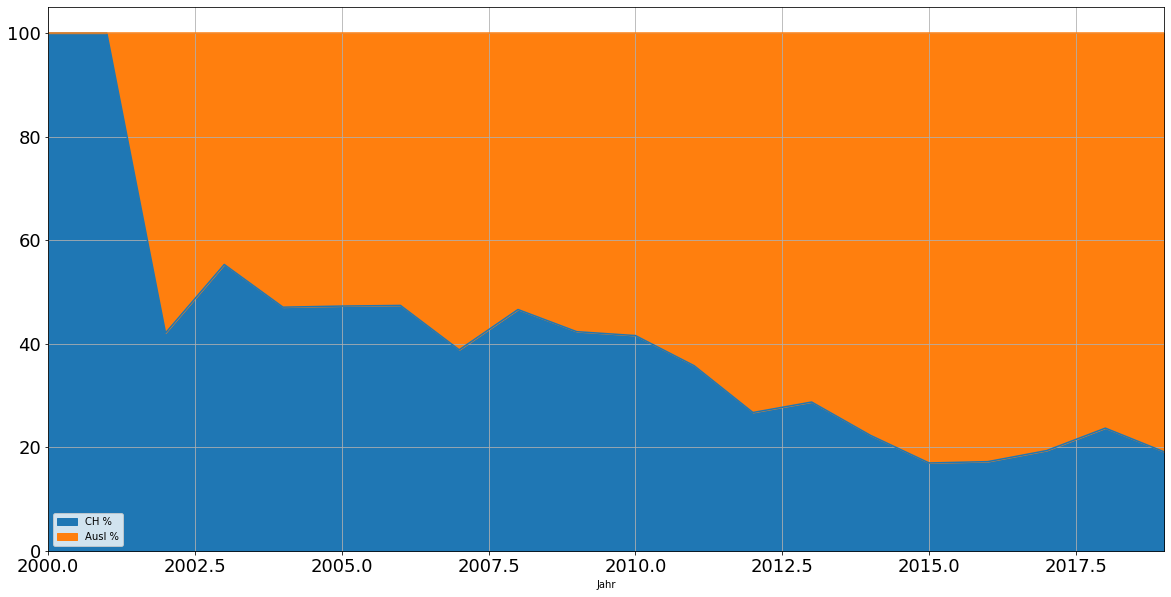

In [68]:
df_plot.plot(x = 'Jahr', y = ['CH %', 'Ausl %'], kind = 'area', grid = True, fontsize = 18, figsize=(20,10))

In [69]:
df_all.to_csv(r'/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/analysis_output/Psych_Land_Medizinstudium_2000b2019.csv',index = 'Jahr', header=True)

### Resultat 5: Der Gesamtanteil an neu zugelassenen Fachärzten 'Psychiatrie und Psychotherapie' ist in den letzten Jahren gesunken,  im Vergleich zur Vordekade hat er sich seit 2010 gut halbiert. 
Wir möchten jetzt noch die Daten der direkt anerkannten Diplome separat der Tabelle hinzufügen (sie sind aber bereits in den Daten der Spalte 'Ausland' berücksichtigt). Besonders seit 2012 ist hier ein grosser Anstieg zu verzeichnen, zeigte bereits eine frühere Auswertung von BAG-Daten.

In [70]:
df_anerkannt = df.groupby('PP_Anerkennung')['PP_Anerkennung'].count()

In [71]:
df_anerkannt = df_anerkannt.to_frame(name='Anerkannt')

In [72]:
df_anerkannt.reset_index(inplace = True)

In [73]:
df_anerkannt = df_anerkannt.rename(columns = {'PP_Anerkennung' : 'Jahr'})

In [74]:
df_anerkannt = df_anerkannt.drop([0], axis=0)

In [75]:
df_all2 = pd.merge(df_all, df_anerkannt, how='outer', on='Jahr')

In [76]:
df_all2.tail(3)

,Jahr,CH,Ausland,Total,CH %,Ausl %,Anerkannt
53,2017,48,200.0,248,19.354839,80.645161,130.0
54,2018,50,161.0,211,23.696682,76.303318,94.0
55,2019,35,148.0,183,19.125683,80.874317,94.0


In [77]:
df_2002 = df_all2.tail(18)

In [78]:
df_2002

,Jahr,CH,Ausland,Total,CH %,Ausl %,Anerkannt
38,2002,109,150.0,259,42.084942,57.915058,59.0
39,2003,146,118.0,264,55.303030,44.696970,72.0
40,2004,72,81.0,153,47.058824,52.941176,46.0
41,2005,78,87.0,165,47.272727,52.727273,58.0
42,2006,91,101.0,192,47.395833,52.604167,54.0
43,2007,66,104.0,170,38.823529,61.176471,66.0
44,2008,103,118.0,221,46.606335,53.393665,60.0
45,2009,80,109.0,189,42.328042,57.671958,50.0
46,2010,74,104.0,178,41.573034,58.426966,63.0
47,2011,69,124.0,193,35.751295,64.248705,62.0


In [79]:
import matplotlib.pyplot as plt

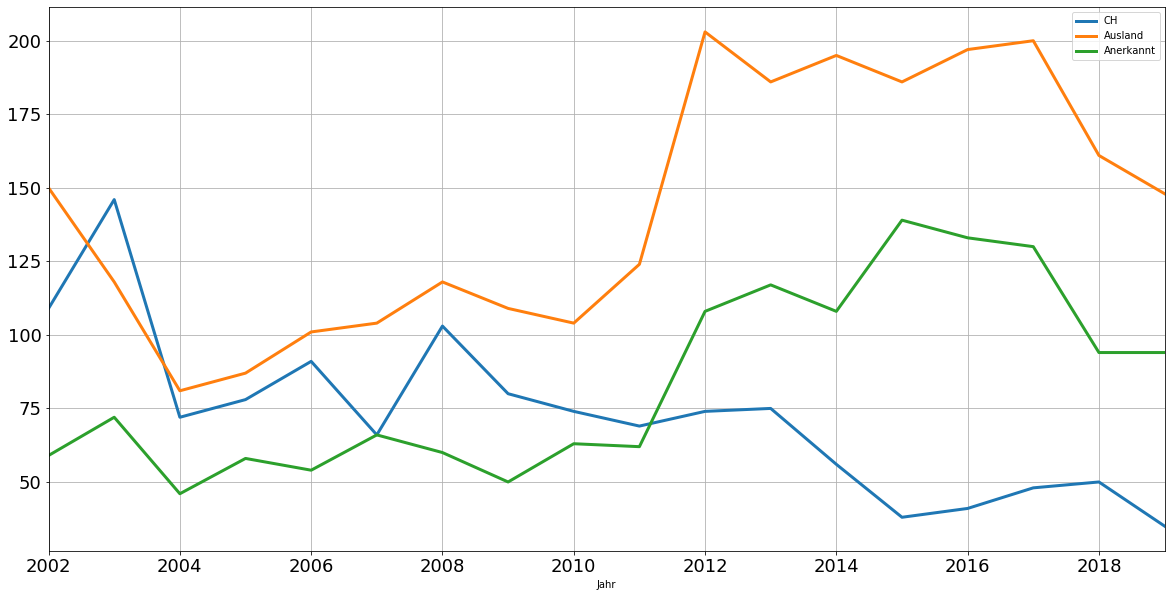

In [80]:
df_2002.plot(x="Jahr", y=["CH", "Ausland", "Anerkannt"], grid = True, linewidth=3, fontsize = 18, figsize=(20,10))

## Check: Quervergleich
Wir wollen diese Analyse noch mit den vom BAG zur Verfügung gestellten Daten aus dem Jahr 2018 vergleichen. Allerdings sind dort nur alle Einträge mit erteilter Berufsausübungsbewilligung registriert. 

In [82]:
df_bag2018 = pd.read_excel(r'/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/data_input/rohdaten-aktive-bab-med-2018_mod.xlsx')

In [83]:
df_bag2018.head(2)

,Beruf,Geschlecht,Bewilligungskanton,Bewilligungsstatus,JahrEntscheidBewilligung,Diplomtyp,ErteilungslandDiplom,JahrErteilungDiplom,JahrAnerkennungDiplom,JahrGleichwertigkeitDiplom,Facharzttitel,GV_SP_Roh,Weiterbildungstiteltyp,ErteilungslandWBT,JahrErteilungWBT,JahrAnerkennungWBT,JahrGleichwertigkeitWBT
0,Ärztin/Arzt,Männlich,Basel-Land,Erteilt,1985,Eidg. Diplom,Schweiz,1985,NaN,NaN,Pneumologie,Spezialistentitel,Eidg. Weiterbildungstitel,Schweiz,1985.0,NaN,NaN
1,Ärztin/Arzt,Männlich,Basel-Land,Erteilt,1985,Eidg. Diplom,Schweiz,1985,NaN,NaN,Allgemeine Innere Medizin,Grundversorgertitel,Eidg. Weiterbildungstitel,Schweiz,1985.0,NaN,NaN


In [84]:
df_bag2018_psych = df_bag2018[df_bag2018['Facharzttitel'] == 'Psychiatrie und Psychotherapie']

In [85]:
len(df_bag2018_psych)

4337

In [86]:
df_bag2018_psych['JahrAnerkennungWBT'].value_counts()

2015.0    86
2013.0    85
2012.0    79
2016.0    72
2014.0    67
2011.0    63
2003.0    62
2002.0    62
2007.0    61
2017.0    54
2010.0    46
2005.0    46
2004.0    40
2008.0    40
2009.0    39
2006.0    36
2018.0    24
Name: JahrAnerkennungWBT, dtype: int64

In [87]:
df_bag2018_psych['JahrGleichwertigkeitWBT'].value_counts()

Series([], Name: JahrGleichwertigkeitWBT, dtype: int64)

Check über alle Ärztegruppen:

In [88]:
df_bag2018['JahrGleichwertigkeitWBT'].value_counts()

2018.0    1
Name: JahrGleichwertigkeitWBT, dtype: int64

Dieses Feld erscheint praktisch obsolet, über alle Fachrichtungen wurde bloss ein Eintrag im Jahr 2018 darin festgehalten. 

## Check 1: Vergleich mit Zahlen 2018 des BAG
Wir müssen die Daten nochmals überprüfen. Zumindest bei erteilter Berufsbewilligung kommen wir auf tiefere Zahlen, was die Anerkennung von Weiterbildungstiteln betrifft. 
Wir vergleichen dazu nochmals die Daten aus dem Scraping, aber nehmen nur jene mit erteilter Bewilligung. 



In [89]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Doc_ID,Name,Geschlecht,Adresse,Ort,Nationalität,Sprache,Arzt_Jahr,Arzt_Land,Arzt_Anerkennung_Jahr,PP_Jahr,PP_Land,PP_Anerkennung,BAB,BAB Status,Datei,PP_CH
0,0,0,552,"Poleski, Alexander",m,"Chemin des Allières 1,1012 Lausanne,VD",1012 Lausanne,Schweiz (CH),Französisch,1985,Schweiz,NaN,1986,Schweiz,0,"Waadt (1986), aktiv, MedBG, pri...",Erteilt,medreg_552.html,1986
1,1,1,566,"Langegger, Florian",m,"Seestrasse 22,8592 Uttwil,TG",8592 Uttwil,Schweiz (CH),Deutsch,1985,Schweiz,NaN,1985,Schweiz,0,"Thurgau (2017), aktiv, MedBG, p...",Erteilt,medreg_566.html,1985
2,2,2,590,"Rivera Prada, Jaime",m,Kein Eintrag,NaN,Schweiz (CH),Französisch,1985,Schweiz,NaN,1987,Schweiz,0,"Wallis (2014), inaktiv, Unbekannt",Erteilt,medreg_590.html,1987


In [90]:
df_erteilt = df[df['BAB Status'] == 'Erteilt']

In [91]:
len(df_erteilt)

4415

In [92]:
df_erteilt['PP_Anerkennung'].value_counts()

0       3432
2015      86
2016      83
2012      80
2013      75
2017      75
2014      69
2003      60
2002      51
2011      51
2007      49
2018      47
2005      42
2010      41
2006      40
2008      36
2009      34
2004      33
2019      31
Name: PP_Anerkennung, dtype: int64

In [93]:
df['PP_Anerkennung'].value_counts()

0       3900
2015     139
2016     133
2017     130
2013     117
2012     108
2014     108
2019      94
2018      94
2003      72
2007      66
2010      63
2011      62
2008      60
2002      59
2005      58
2006      54
2009      50
2004      46
Name: PP_Anerkennung, dtype: int64

Also: wir kommen bei allen Psychiatern mit erteilter kantonaler Bewilligung für das Jahr 2018 auf 47 anerkannte Diplome, 2017: 75, 2016: 83, 2015: 86. 

Die BAG-Datei 2018 liefert uns für 2015 ebenfalls 86 Anerkennungen, für 2016: 72 (-9), für 2017: 54 (-21), für 2018: bloss 24 (-23). 

Die Zahlen liegen näher, je weiter die Anerkennung zurückliegt. **Dies erscheint schlüssig: werden sich doch Ärztinnen und Ärzte erst nach der Anerkennung ihrer Titel bei einem Kanton um eine Bewilligung bemühen, wenn sie sich zum Beispiel mit einer eigenen Praxis niederlassen wollen.** Deshalb kommt es vermutlich zu diesem verzögerten Effekt. 

## Check 2: Anerkannte Weiterbildungstitel
Um der Grundlage unserer Datenanalyse sicher zu sein, prüfen wir noch eine weitere Datenquelle des BAG, die wir bereits in einem frühren Schritt ausgewertet haben. Es handelt sich dabei um die Datei *uebersicht-anerkannte-wbt-humanmedizin-2018* über die Anerkennung ausländischer Facharzttitel [Link](https://www.bag.admin.ch/dam/bag/de/dokumente/berufe-gesundheitswesen/medizinalberufe/statistiken/med/uebersicht-anerkannte-wbt-humanmedizin-2018.xlsx.download.xlsx/uebersicht-anerkannte-wbt-humanmedizin-2018.xlsx). 

Diese [Auswertung](/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/data_input/BAG_Anerkennung_Psychiatrie_eigene_Auswertung_Summe.numbers) ergab bis 2018 folgende Zahlenreihe:
61	74	48	59	53	65	64	53	62	66	107	118	107	139	135	123	93, das heisst:

2018: 93 Anerkennungen (Scrapingdaten: 94, +1)

2017: 123 (130, +7)

2016: 135 (133, -2)

2015: 139 (139, 0)

2014: 107 (108, +1)

Fazit: auch hier sind es sehr wahrscheinlich Mutationen, die zu diesen Unterschieden führt. Die Abweichungen sind eher gering - und wirken sich nicht nur wenig auf das Gesamtbild aus. Die Zahlen aus der Auswertung zeichnen deshalb ein Bild, mit der Einschränkung, dass wir nicht wissen, ob und in welchem Grad die im MedReg registrierten Ärztinnen und Ärzte tätig sind. Das gilt aber für alle gleichermassen. 




## Check 3: Check mit Datenreihen vom Obsan
Das Gesundheitsobervatorium macht mit dem MedReg ähnliche Auswertungen. Nach Absprache mit der Projektleiterin erhalte ich die bis 2017 nachgeführten Zahlen zugestellt. Ein Abgleich zeigt, dass meine Daten nur unwesentlich daneben liegen und höchstwahrscheinlich auf Mutationen des MedReg (Zu- und Wegzüge, nachträgliche Erfassungen, Todesfälle) zurückzuführen sind. 

Die Auswertung findet sich als Excel-Datei [hier](/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/data_input/Obsan_WeiterbildungstitelPsychiatrie_ergänzt.xlsx) im Ordner data_input.



## Keine Zeit für weitere Auswertungen

Die gewonnenen Daten reichen aus um die These zu stützen. Gerne hätte ich noch, wie eingangs beschrieben, detailliertere Analysen gemacht. Doch ich habe schon enorm viel Zeit investiert und muss mich jetzt darauf konzentrieren, die Story als TV-Beitrag gut umzusetzen. Vor allem die Suche nach Betroffenen, die vor der Kamera Aussagen machen ist schwierig. Zudem sind die Drehorte weitverstreut. 

Die csv-Exporte bereite ich in Numbers auf und erstelle daraus auch pdf's, um Interviewpartner aber auch intern die Grafik und die Redaktion zu briefen. 

Die pdfs finden sich im Ordner [analysis_output_pdf](/Users/master/Desktop/CAS_DJ_Psychiatrie/Psychiatrie/analysis_output_pdf).

